In [1]:
import cv2
import numpy as np
from skimage import io,img_as_float
from skimage.color import rgb2gray
from scipy.stats import kurtosis,skew,entropy
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train='D:/reshma/phd/segmentation_taditional/work/test_work/classify_coral/train/'
test='D:/reshma/phd/segmentation_taditional/work/test_work/classify_coral/test/'

## mean feature

In [6]:
def feature_extraction(dir):
    df=pd.DataFrame()
    for cls in os.listdir(dir):
        print(cls)
        for image in os.listdir(os.path.join(dir,cls)):
            read_img=cv2.imread(os.path.join(dir,cls,image),cv2.IMREAD_GRAYSCALE)/255

            df=df.append({
                "Class":cls,
                "Image_path":os.path.join(dir,cls,image),
                "Mean":np.mean(read_img),
                "Median":np.median(read_img),
                "Std":np.std(read_img),
                "Kurtosis":kurtosis(read_img,axis=None),
                "Skew":skew(read_img,axis=None),
                "Entropy":entropy(read_img,axis=None),
            },ignore_index=True)
    return df

In [7]:
df_train=feature_extraction(train)
df_test=feature_extraction(test)

acropora
dead
pavona
pc
acropora
dead
pavona
pc


In [8]:
df_train

,Class,Image_path,Mean,Median,Std,Kurtosis,Skew,Entropy
0,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.229496,0.176471,0.140781,3.275647,2.049891,9.557128
1,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.262534,0.223529,0.126057,1.774850,1.541453,9.604481
2,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.280316,0.235294,0.133746,0.483844,1.166018,9.601376
3,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.285861,0.235294,0.138922,0.865783,1.356577,9.600472
4,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.265204,0.203922,0.143287,0.936268,1.357664,9.576934
...,...,...,...,...,...,...,...,...
2243,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.165090,0.141176,0.092218,1.629412,1.274449,9.563025
2244,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.182453,0.188235,0.089479,-0.194360,0.393833,9.579444
2245,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.157688,0.125490,0.102760,4.439419,2.231484,9.541526
2246,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.219681,0.203922,0.099509,-0.010880,0.676504,9.603578


In [40]:
df_train.to_csv("train_statistical.csv",index=False)

In [15]:
train_features=df_train.loc[:, ~df_train.columns.isin(['Class', 'Image_path'])]

In [25]:
train_classes=df_train['Class'].to_numpy()

In [26]:
train_features

,Mean,Median,Std,Kurtosis,Skew,Entropy
0,0.229496,0.176471,0.140781,3.275647,2.049891,9.557128
1,0.262534,0.223529,0.126057,1.774850,1.541453,9.604481
2,0.280316,0.235294,0.133746,0.483844,1.166018,9.601376
3,0.285861,0.235294,0.138922,0.865783,1.356577,9.600472
4,0.265204,0.203922,0.143287,0.936268,1.357664,9.576934
...,...,...,...,...,...,...
2243,0.165090,0.141176,0.092218,1.629412,1.274449,9.563025
2244,0.182453,0.188235,0.089479,-0.194360,0.393833,9.579444
2245,0.157688,0.125490,0.102760,4.439419,2.231484,9.541526
2246,0.219681,0.203922,0.099509,-0.010880,0.676504,9.603578


In [32]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(train_features.values)
train_scaled_features_df = pd.DataFrame(scaled_features, index=train_features.index, columns=train_features.columns)

In [33]:
train_scaled_features_df

,Mean,Median,Std,Kurtosis,Skew,Entropy
0,-0.948893,-1.156723,0.648024,1.727972,2.164052,-1.384509
1,-0.663817,-0.794062,0.275448,0.857024,1.450742,-0.503112
2,-0.510379,-0.703396,0.470005,0.107823,0.924028,-0.560914
3,-0.462536,-0.703396,0.600988,0.329471,1.191372,-0.577743
4,-0.640779,-0.945171,0.711433,0.370375,1.192897,-1.015858
...,...,...,...,...,...,...
2243,-1.504637,-1.428720,-0.580844,0.772623,1.076151,-1.274749
2244,-1.354817,-1.066058,-0.650140,-0.285755,-0.159303,-0.969144
2245,-1.568507,-1.549607,-0.314070,2.403336,2.418815,-1.674921
2246,-1.033582,-0.945171,-0.396332,-0.179278,0.237268,-0.519933


In [21]:
train_classes

['acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'acropora',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 

In [17]:
df_test

,Class,Image_path,Mean,Median,Std,Kurtosis,Skew,Entropy
0,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.273622,0.231373,0.106319,1.656542,1.563217,9.638144
1,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.350766,0.333333,0.104616,1.065253,1.105503,9.662472
2,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.306889,0.274510,0.123051,-0.075349,0.841957,9.627894
3,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.255748,0.235294,0.107492,4.081087,1.869867,9.628192
4,acropora,D:/reshma/phd/segmentation_taditional/work/tes...,0.287421,0.239216,0.142255,0.673113,1.230589,9.594635
...,...,...,...,...,...,...,...,...
543,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.476483,0.505882,0.132042,-0.777147,-0.236266,9.663559
544,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.280656,0.274510,0.081532,2.281636,1.233461,9.664686
545,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.394074,0.364706,0.163281,-1.131051,0.377154,9.618540
546,pc,D:/reshma/phd/segmentation_taditional/work/tes...,0.417823,0.415686,0.066101,1.790273,0.382859,9.691566


In [41]:
df_test.to_csv("test_statistical.csv",index=False)

In [18]:
test_features=df_test.loc[:, ~df_test.columns.isin(['Class', 'Image_path'])]

In [27]:
test_classes=df_test['Class'].to_numpy()

In [28]:
test_features

,Mean,Median,Std,Kurtosis,Skew,Entropy
0,0.273622,0.231373,0.106319,1.656542,1.563217,9.638144
1,0.350766,0.333333,0.104616,1.065253,1.105503,9.662472
2,0.306889,0.274510,0.123051,-0.075349,0.841957,9.627894
3,0.255748,0.235294,0.107492,4.081087,1.869867,9.628192
4,0.287421,0.239216,0.142255,0.673113,1.230589,9.594635
...,...,...,...,...,...,...
543,0.476483,0.505882,0.132042,-0.777147,-0.236266,9.663559
544,0.280656,0.274510,0.081532,2.281636,1.233461,9.664686
545,0.394074,0.364706,0.163281,-1.131051,0.377154,9.618540
546,0.417823,0.415686,0.066101,1.790273,0.382859,9.691566


In [29]:
test_classes

array(['acropora', 'acropora', 'acropora', 'acropora', 'acropora',
       'acropora', 'acropora', 'acropora', 'acropora', 'acropora',
       'acropora', 'acropora', 'acropora', 'acropora', 'acropora',
       'acropora', 'acropora', 'acropora', 'acropora', 'acropora', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead',
       'dead',

In [34]:

scaled_features = StandardScaler().fit_transform(test_features.values)
test_scaled_features_df = pd.DataFrame(scaled_features, index=test_features.index, columns=test_features.columns)

In [35]:
test_scaled_features_df

,Mean,Median,Std,Kurtosis,Skew,Entropy
0,-0.859058,-1.018253,0.187338,0.738460,1.531432,-0.719769
1,-0.201054,-0.230092,0.144240,0.403770,0.908227,0.029267
2,-0.575305,-0.684801,0.610877,-0.241847,0.549392,-1.035345
3,-1.011515,-0.987939,0.217041,2.110830,1.948954,-1.026181
4,-0.741353,-0.957626,1.096961,0.181807,1.078538,-2.059357
...,...,...,...,...,...,...
543,0.871254,1.103719,0.838448,-0.639088,-0.918674,0.062728
544,-0.799056,-0.684801,-0.440052,1.092283,1.082449,0.097434
545,0.168345,0.012419,1.629177,-0.839409,-0.083466,-1.323354
546,0.370916,0.406499,-0.830648,0.814155,-0.075697,0.925044


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(5),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(train_scaled_features_df, train_classes)
    score = model.score(test_scaled_features_df, test_classes)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
1,SVC,57.66%
2,SVC RBF kernel,56.75%
0,KNeighborsClassifier,54.38%
4,RandomForestClassifier,54.38%
7,QuadraticDiscriminantAnalysis,52.55%
6,GaussianNB,51.09%
3,DecisionTreeClassifier,46.53%
5,AdaBoostClassifier,42.34%


In [39]:
from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
model = MLPClassifier(
    random_state = 69
)

# #################### unscaled features #####################
# X_train, X_test, y_train, y_test = train_test_split(
#     features, 
#     emotions, 
#     test_size=0.2, 
#     random_state=69
# )
  
model.fit(train_scaled_features_df, train_classes)

print(f'Possible emotions predicted by model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*model.score(train_scaled_features_df, train_classes):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test set is {100*model.score(test_scaled_features_df, test_classes):.2f}%')

Possible emotions predicted by model:['acropora' 'dead' 'pavona' 'pc']
Unscaled MLP Model's accuracy on training set is 62.77%
Unscaled MLP Model's accuracy on test set is 54.74%


C:\Users\CMFRI\anaconda3\envs\gpuenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


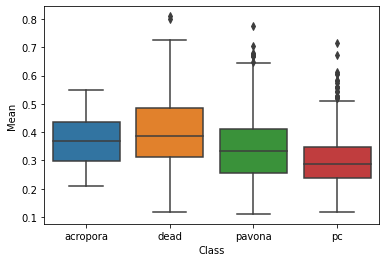

In [48]:
ax = sns.boxplot(x="Class", y="Mean", data=df)

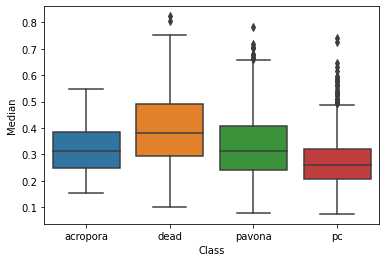

In [49]:
ax = sns.boxplot(x="Class", y="Median", data=df)

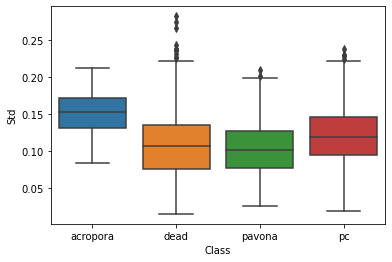

In [50]:
ax = sns.boxplot(x="Class", y="Std", data=df)

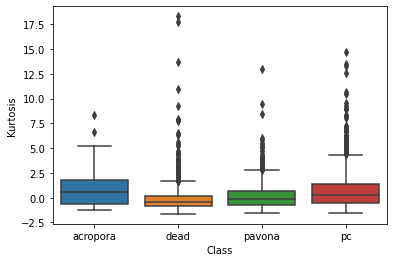

In [51]:
ax = sns.boxplot(x="Class", y="Kurtosis", data=df)

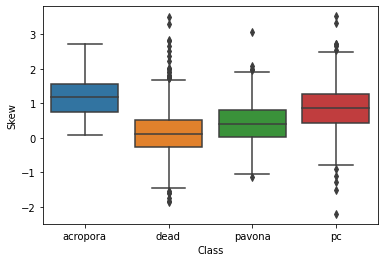

In [52]:
ax = sns.boxplot(x="Class", y="Skew", data=df)

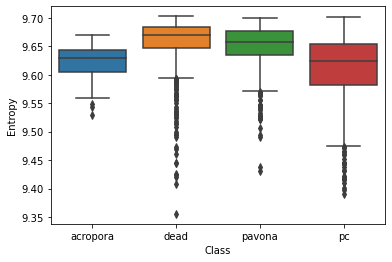

In [53]:
ax = sns.boxplot(x="Class", y="Entropy", data=df)